# Import the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kanth\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Load The Dataset

In [3]:
data = pd.read_csv('vgsales.csv')

print(data)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

# Exploratory Data Analysis

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
data.shape

(16598, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Data Cleaning

In [8]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
data = data.dropna(subset=['Year', 'Publisher'])


In [10]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
data_duplicates = data.duplicated().any()
print(data_duplicates)

False


# Outliers Detection by Using boxplots

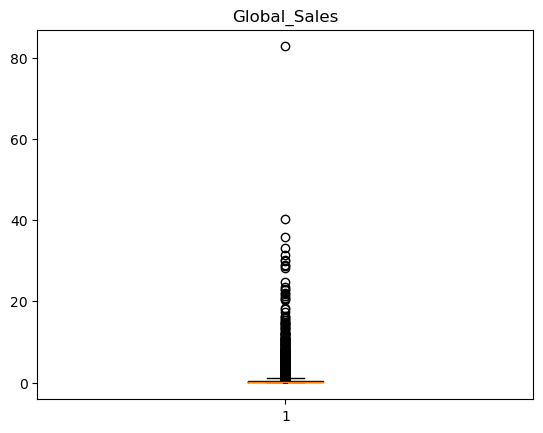

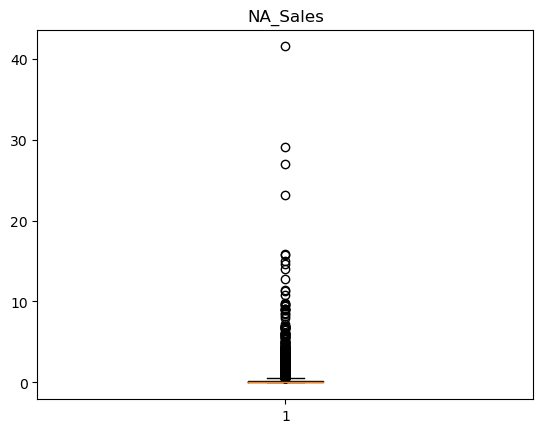

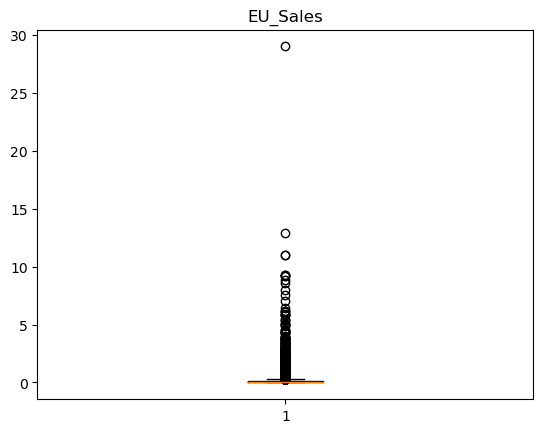

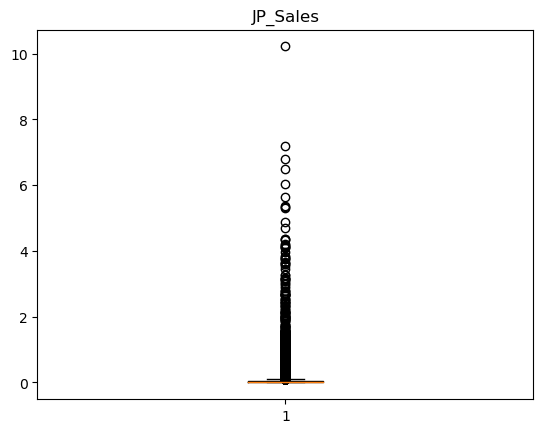

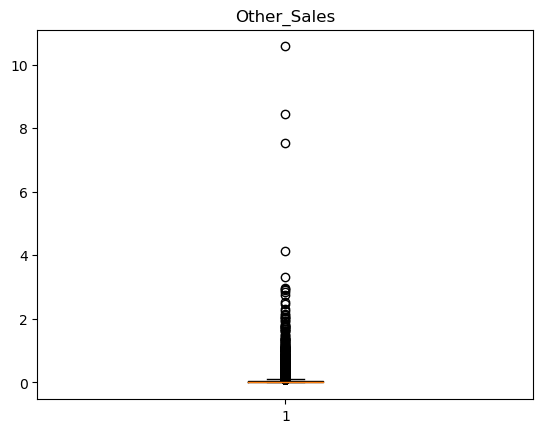

In [12]:
numerical_columns = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
for column in numerical_columns:
    plt.boxplot(x=data[column])
    plt.title(column)
    plt.show()


The box plots for the numerical columns—Global_Sales, NA_Sales, EU_Sales, JP_Sales, and Other_Sales are showing potential outliers.

# Outliers Detection by Using IQR Method

In [13]:
numerical_columns =['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
for column in numerical_columns:
    print(column, ":")
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    upper_tail = q3+1.5*iqr
    lower_tail = q1-1.5*iqr
    
    print("q1 --->", q1)
    print("q3 --->", q3)
    print("iqr --->",iqr)
    print("uppertail --->", upper_tail)
    print("lowertail --->", lower_tail)
    print("_"*50)

Global_Sales :
q1 ---> 0.06
q3 ---> 0.48
iqr ---> 0.42
uppertail ---> 1.1099999999999999
lowertail ---> -0.5700000000000001
__________________________________________________
NA_Sales :
q1 ---> 0.0
q3 ---> 0.24
iqr ---> 0.24
uppertail ---> 0.6
lowertail ---> -0.36
__________________________________________________
EU_Sales :
q1 ---> 0.0
q3 ---> 0.11
iqr ---> 0.11
uppertail ---> 0.275
lowertail ---> -0.165
__________________________________________________
JP_Sales :
q1 ---> 0.0
q3 ---> 0.04
iqr ---> 0.04
uppertail ---> 0.1
lowertail ---> -0.06
__________________________________________________
Other_Sales :
q1 ---> 0.0
q3 ---> 0.04
iqr ---> 0.04
uppertail ---> 0.1
lowertail ---> -0.06
__________________________________________________


Based on the IQR method, any values above the upper tail or below the lower tail are considered outliers.
This analysis confirms that all the numerical columns in this dataset have potential outliers. 
This observation aligns with the above generated box plots.

However, instead of removing outliers, which might result in the loss of valuable insights, a more prudent approach is data transformation. This involves techniques like checking the skewness of the data, which can help in understanding and mitigating the impact of outliers.

# Skewness Analysis

In [14]:
from scipy.stats import skew
skew_data = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']

for num_column in skew_data:
    print(num_column,"---->" ,skew (data[num_column]))  

Global_Sales ----> 17.30271833337404
NA_Sales ----> 18.739187192468687
EU_Sales ----> 18.77306742459949
JP_Sales ----> 11.123189283524262
Other_Sales ----> 24.100390181995717


All the numerical columns showing skewness values above zero indicate that these distributions are right-skewed or positively skewed. 

This means that the majority of data points are concentrated on the left side, with the tail extending to the right.

# Visualizations for Data Skewness

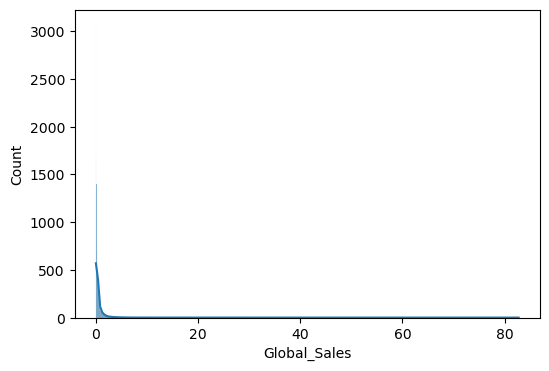

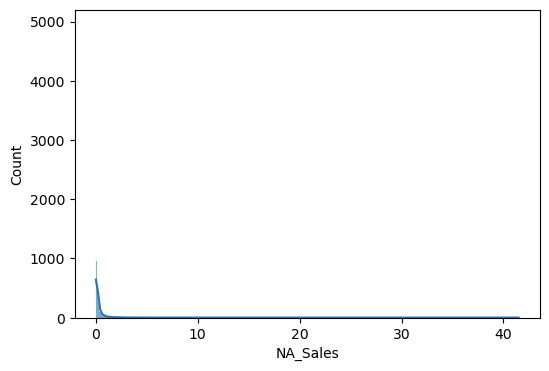

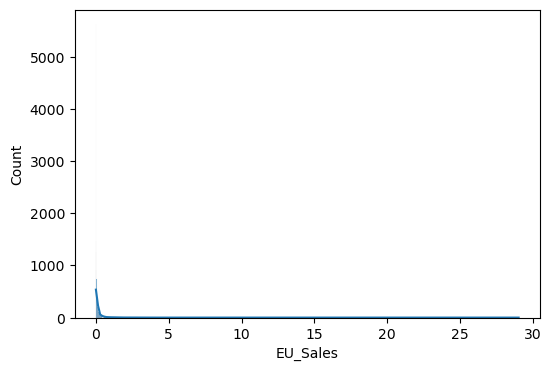

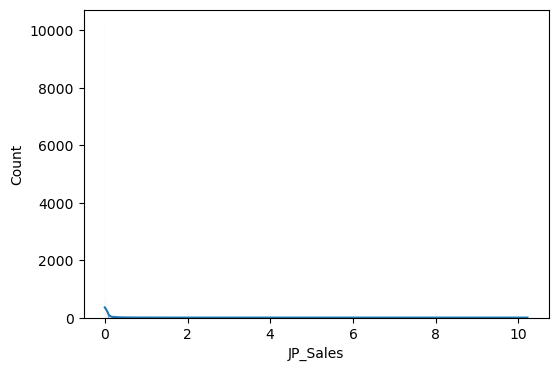

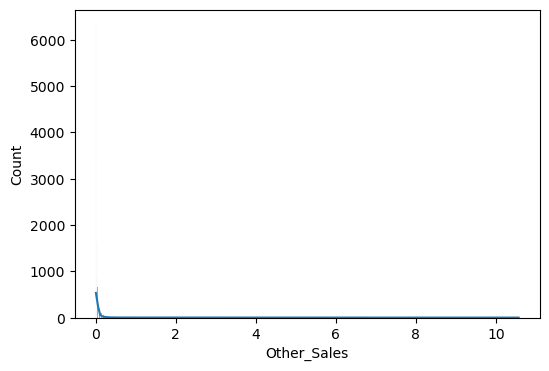

In [15]:
for num_column in skew_data:
    plt.figure(figsize=(6,4))
    sns.histplot(data[num_column],kde = True)
    plt.show()

# Data Transformation Using Square Root Method

In [16]:
for num_column in skew_data:
    data[num_column] = np.sqrt (data[num_column])

# Skewness Visualization

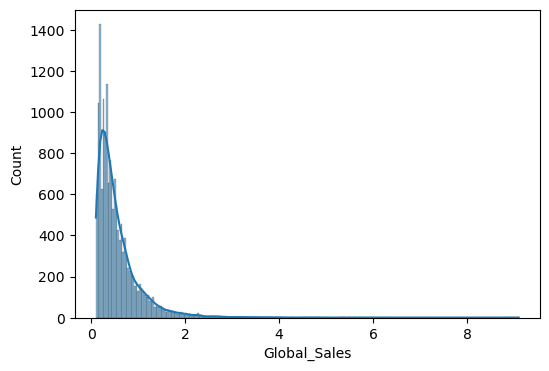

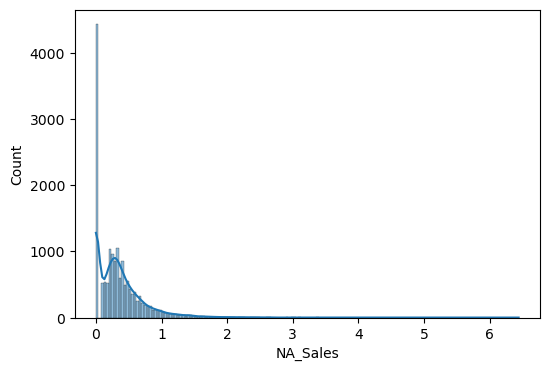

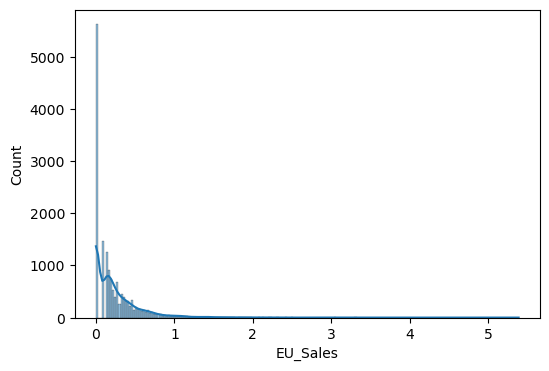

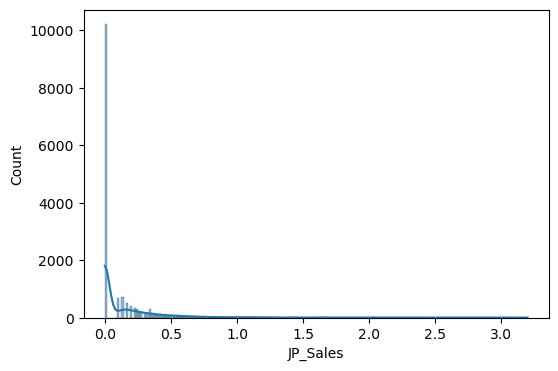

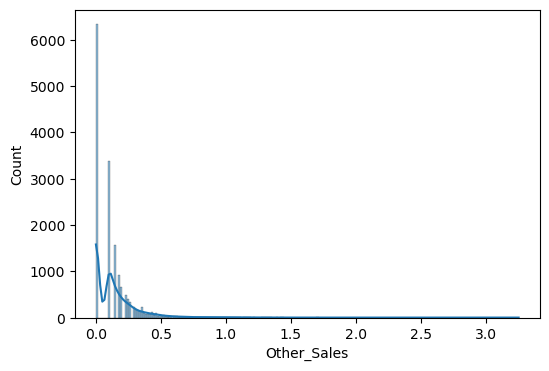

In [17]:
for num_column in skew_data:
    plt.figure(figsize=(6,4))
    sns.histplot(data[num_column],kde = True)
    plt.show()

# Skewness Analysis After SQRT Transformation

In [18]:
for num_column in skew_data:
    print(num_column,"--->",skew(data[num_column]))

Global_Sales ---> 3.3196428991638443
NA_Sales ---> 2.6974427236910032
EU_Sales ---> 2.8987909195167156
JP_Sales ---> 3.2232512614377176
Other_Sales ---> 3.288015080883035


The skewness values for each column have significantly decreased After applying the square root transformation, 
but still indicate positive skewness, comparatively less skewed than before.

In [19]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,6.441273,5.387021,1.941649,2.908608,9.096153
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,5.392588,1.892089,2.609598,0.877496,6.343501
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.981206,3.588872,1.946792,1.819341,5.984981
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.968627,3.318132,1.811077,1.720465,5.744563
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,3.357082,2.981610,3.196873,1.000000,5.600893
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.100000,0.000000,0.000000,0.000000,0.100000
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.100000,0.000000,0.000000,0.000000,0.100000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.000000,0.000000,0.000000,0.000000,0.100000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.000000,0.100000,0.000000,0.000000,0.100000


In [20]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,6.441273,5.387021,1.941649,2.908608,9.096153
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,5.392588,1.892089,2.609598,0.877496,6.343501
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.981206,3.588872,1.946792,1.819341,5.984981
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.968627,3.318132,1.811077,1.720465,5.744563
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,3.357082,2.981610,3.196873,1.000000,5.600893


In [20]:
data.to_csv('Cleaned_vgsales.csv', index=False)
print("Cleaned data exported to 'Cleaned_vgsales.csv'")

Cleaned data exported to 'Cleaned_vgsales.csv'


# Load The Cleaned Dataset

In [24]:
data = pd.read_csv('Cleaned_vgsales.csv')

print(data)

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16286  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16287  16597                     Men in Black II: Alien Escape       GC   
16288  16598  SCORE International Baja 1000: The Official Game      PS2   
16289  16599                                        Know How 2       DS   
16290  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [25]:
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,6.441273,5.387021,1.941649,2.908608,9.096153
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,5.392588,1.892089,2.609598,0.877496,6.343501
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.981206,3.588872,1.946792,1.819341,5.984981
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.968627,3.318132,1.811077,1.720465,5.744563
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,3.357082,2.981610,3.196873,1.000000,5.600893


In [26]:
data.tail()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.1,0.0,0.0,0.0,0.1
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.1,0.0,0.0,0.0,0.1
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0,0.0,0.0,0.0,0.1
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.0,0.1,0.0,0.0,0.1
16290,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.1,0.0,0.0,0.0,0.1


# Descriptive Statistics

In [30]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.347314,0.234229,0.132293,0.133526,0.553238
std,4792.654450,5.832412,0.380826,0.304752,0.247660,0.174925,0.484616
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.244949
50%,8292.000000,2007.000000,0.282843,0.141421,0.000000,0.100000,0.412311
75%,12439.500000,2010.000000,0.489898,0.331662,0.200000,0.200000,0.692820
max,16600.000000,2020.000000,6.441273,5.387021,3.196873,3.251154,9.096153


# Data Visualization

# Total Sales by Region

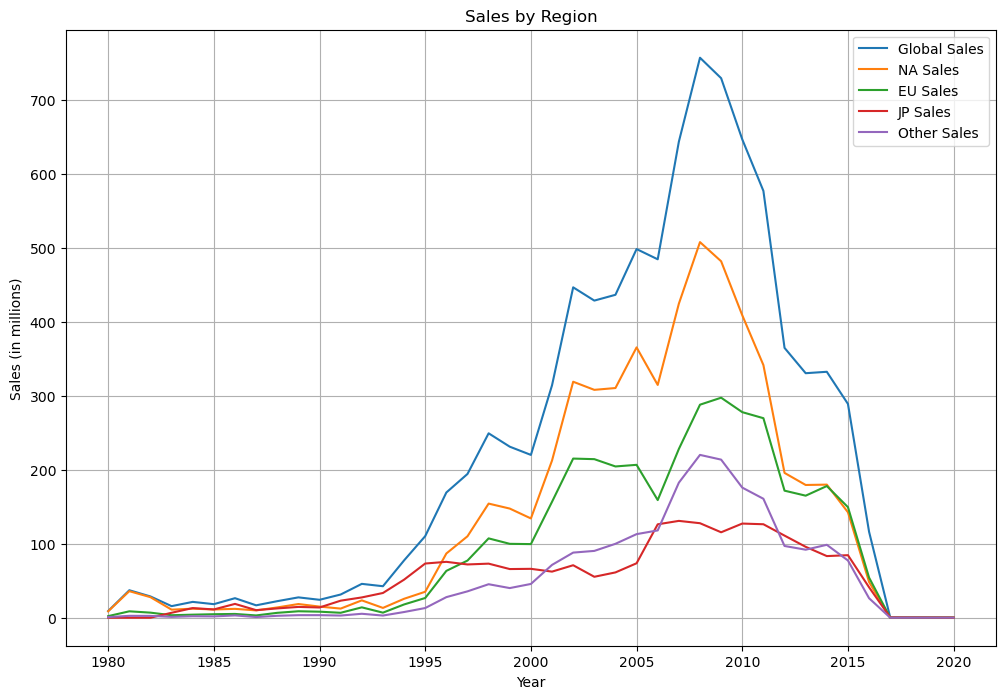

In [34]:
sales_by_year = data.groupby('Year')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()


plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', label='Global Sales')
sns.lineplot(data=sales_by_year, x='Year', y='NA_Sales', label='NA Sales')
sns.lineplot(data=sales_by_year, x='Year', y='EU_Sales', label='EU Sales')
sns.lineplot(data=sales_by_year, x='Year', y='JP_Sales', label='JP Sales')
sns.lineplot(data=sales_by_year, x='Year', y='Other_Sales', label='Other Sales')

plt.title('Sales by Region')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend()
plt.grid(True)
plt.show()

In all the years, the Global Sales region consistently held in the first place. In 2008, Global Sales reached their highest point. This was the year when the overall video game market saw significant growth, with multiple high-selling games contributing to the surge in sales.North America  making it the second-highest sales region followed by Europe Sales,Japan sales and Other Sales.

# Correlation Matrix for Sales and Year

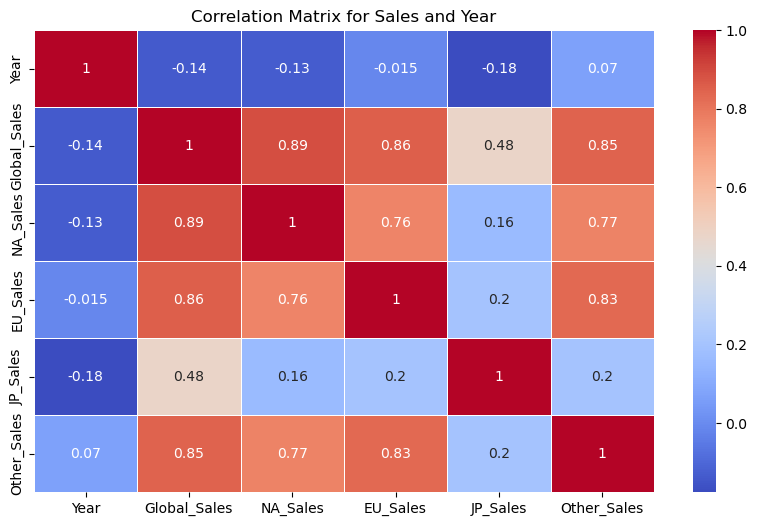

In [36]:


correlation_columns = ['Year', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


correlation_matrix = data[correlation_columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sales and Year')
plt.show()


Global_Sales and Regional Sales:

Global_Sales and NA_Sales: 0.89

Global_Sales and EU_Sales: 0.86

Global_Sales and JP_Sales: 0.48

Global_Sales and Other_Sales: 0.85

These high positive correlations suggest that as global sales increase, sales in North America, Europe, and other regions also 
increase significantly. Japan sales have a moderate positive correlation with global sales.